# Importing and Loading packages


In [50]:
#install.packages("here")
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
#install_all_packages()
load_library_packages()

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

[[21]]
[1] TRUE

[[22]]
[1] TRUE

[[23]]
[1] TRUE

[[24]]
[1] TRUE

[[25]]
[1] TRUE

[[26]]
[1] TRUE

[[27]]
[1] TRUE

[[28]]
[1] TRUE

# Importing and Exploring the Dataset

In [51]:
df <- read_excel(path = here('Data','before_pa.xlsx'))
df <- data.frame(df)
dim(df)
unique(sapply(df, class))
head(df)

[1] 1255   79

[1] "numeric"

,sex,age_range,martialStatus,state,zone,co.resident_range,rooms_range,income_range,scholarity,diabetes,...,PA_barriers_before_tiredness,PA_barriers_before_location_distance,PA_barriers_before_money,PA_barriers_before_time_convenience,PA_barriers_before_hard_task,PA_barriers_before_interest,PA_barriers_before_none,PA_practice_during,sedentary_time_range_during,PA_intensity_during
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2,1,25,2,1,1,4,4,0,...,0,0,0,1,0,0,0,1,5,1
2,2,3,1,21,1,2,3,6,4,0,...,1,0,0,0,0,0,0,0,4,2
3,1,3,1,21,1,2,2,5,3,0,...,0,0,1,0,0,0,0,0,2,2
4,1,3,1,21,1,1,1,3,4,0,...,0,0,0,1,0,0,0,0,3,2
5,1,2,2,25,2,2,2,6,4,0,...,0,0,0,0,0,0,0,0,5,2
6,2,3,2,21,1,2,2,6,6,0,...,0,0,0,0,0,0,0,0,2,3


# Adding new Columns

In [52]:
sports = c('running_before','hiking_before','cycling_before','muscle_training_before',
'soccer_before','tennis_before','volleyball_before','basketball_before',
'swimming_before','surfing_before','yoga_before','pilates_before',
'fighting_before','other_sports_before')
    
df[, "pa_number_before"] = rowSums(df[, sports])

# Treating missing data

### As the dataset had little missing data, we chose to omit them

In [53]:
df <- df[complete.cases(df), ]
dim(df)

[1] 1242   80

# Treating variables type

### Changing some class names to make insights easier with clear lables
For columns PA_practice_before and PA_practive_during:
 - 0 -> practice
 - 1 -> dont_practice

For columns PA_intesity:
 - 4 -> 0 (class 4 means don't practice, we need to make it smaller then other intensities)


For column PA_duration_before:
 - 5 -> 0 (class 5 means don't practice, we need to make it smaller then other durations )


In [54]:
df$PA_practice_before[df$PA_practice_before == 0] <- "practice"
df$PA_practice_before[df$PA_practice_before == 1] <- "dont_practice"
df$PA_practice_during[df$PA_practice_during == 0] <- "practice"
df$PA_practice_during[df$PA_practice_during == 1] <- "dont_practice"
df$PA_intensity_before[df$PA_intensity_before == 4] <- 0
df$PA_intensity_during[df$PA_intensity_during == 4] <- 0
df$PA_duration_before[df$PA_duration_before == 5] <- 0


### Columns with some sense of order needs to be numeric 
(this type has better support then ordered factor)

In [55]:
numeric_columns = c(
    'age_range',
    'rooms_range',
    'income_range',
    'scholarity',
    'sedentary_time_range_before',
    'co.resident_range',
    "PA_weekly_frequency_before",
    'PA_intensity_before',
    'PA_intensity_during',
    'PA_duration_before',
    "pa_number_before"
)
columns = names(df)
categorical_columns <- columns[!columns %in% numeric_columns]


df[, categorical_columns] <- lapply(df[, categorical_columns], as.factor)
df[, numeric_columns] <- lapply(df[, numeric_columns], as.integer)


df[1, 2] < df[2, 2] 

head(df[, numeric_columns])


[1] TRUE

,age_range,rooms_range,income_range,scholarity,sedentary_time_range_before,co.resident_range,PA_weekly_frequency_before,PA_intensity_before,PA_intensity_during,PA_duration_before,pa_number_before
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2,1,4,4,4,1,4,1,1,2,1
2,3,3,6,4,3,2,3,2,2,3,4
3,3,2,5,3,1,2,2,3,2,2,2
4,3,1,3,4,2,1,4,3,2,3,2
5,2,2,6,4,4,2,4,3,2,3,2
6,3,2,6,6,2,2,3,2,3,2,3


# Sanity Check

### There was no occurrence of DA (Alzheimer) and DP (Parkinson) in the dataset

In [56]:
lapply(df, levels)[c("DA", "DP")]
df <- subset(df, select = -c(DA, DP, state, zone))

$DA
[1] "0"

$DP
[1] "0"

### More then one column have the class "dont_practice", we need to check if they agree.

In [57]:
table(df[, c("PA_practice_before", "PA_duration_before")])
table(df[, c("PA_practice_before", "PA_intensity_before")])
table(df[, c("PA_practice_before", "PA_weekly_frequency_before")])
table(df[, c("PA_practice_before", "pa_number_before")])


                  PA_duration_before
PA_practice_before   0   1   2   3   4
     dont_practice 131   8   4   2   0
     practice        4  60 654 324  55

                  PA_intensity_before
PA_practice_before   0   1   2   3
     dont_practice 131  14   0   0
     practice        2 148 590 357

                  PA_weekly_frequency_before
PA_practice_before   1   2   3   4
     dont_practice 144   0   1   0
     practice        2 424 473 198

                  pa_number_before
PA_practice_before   0   1   2   3   4   5   6   7   9  14
     dont_practice 144   1   0   0   0   0   0   0   0   0
     practice        0 388 364 217  95  22   4   5   1   1

In [58]:
differ_dp <- ( df$PA_duration_before != 0 
                | df$PA_intensity_before != 0 
                | df$PA_weekly_frequency_before != 1 
                | df$pa_number_before != 0
            ) 
strange_dp <- df$PA_practice_before == "dont_practice" & differ_dp 

table(strange_dp)


strange_dp
FALSE  TRUE 
 1227    15 

In [59]:
differ_p <- (   df$PA_duration_before == 0 
                | df$PA_intensity_before == 0 
                | df$PA_weekly_frequency_before == 1
                | df$pa_number_before == 0
            )
strange_p <- df$PA_practice_before == "practice" & differ_p
table(strange_p)



strange_p
FALSE  TRUE 
 1236     6 

Seems that some answers are inconsistent. We found out "strange practice" and "strange don't practice":

- Strange practice: people who said that practiced an exercise before the pandemic, but when asked about the exercise duration or the exercise intesity or the exercise frequency or the exercise type marked as if weren't practicing.
- Strange don't practice: people who said that weren't practicing any exercise before the pandemic, but when asked about the exercise duration or the exercise intesity or the exercise frequency or the exercise type marked as if they were practicing

To avoid losing data (mainly from our minority class), we chose to analyse, with unsupervised machine learning methods, where are those people in our data clusters. 

# Dividing Dataset by output variable

In [60]:
output_variables = c(
    "sedentary_time_range_during",
    "PA_intensity_during",
    "PA_practice_during"
)

before_dataset <- df[, !(names(df) %in% output_variables)]
pa_dataset <-  df[, !(names(df) %in% output_variables[-(3)])]
sedentary_dataset <- df[, !(names(df) %in% output_variables[-(1)])]
intesity_dataset <- df[, !(names(df) %in% output_variables[-(2)])]
before_dataset <- before_dataset
pa_dataset <- pa_dataset
sedentary_dataset <- sedentary_dataset
intesity_dataset <- intesity_dataset


# Unsupervised Learning

### Those model needs the one hot encoded version of our data

In [61]:
df_copy <- df
df_copy[, "strange_dp"] <- strange_dp
df_copy[, "strange_p"] <- strange_p
has_tag_depression <- df$TAG == "1" | df$depression  == "1" 
df_copy[, "has_tag_depression"] <- has_tag_depression
dummy <- dummyVars(" ~ .", data=before_dataset)
before_encoded_dataset <- data.frame(predict(dummy, newdata = before_dataset)) 

## PCA

In [62]:
before_encoded_dataset.pca <- prcomp(before_encoded_dataset , center = TRUE,scale. = TRUE)
summary(before_encoded_dataset.pca) 

Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.90318 2.28711 2.27063 2.13388 1.95700 1.90935 1.89493
Proportion of Variance 0.05936 0.03684 0.03631 0.03207 0.02697 0.02567 0.02529
Cumulative Proportion  0.05936 0.09619 0.13250 0.16457 0.19154 0.21721 0.24250
                           PC8     PC9   PC10   PC11    PC12    PC13    PC14
Standard deviation     1.81427 1.77926 1.7390 1.7018 1.66114 1.64506 1.60614
Proportion of Variance 0.02318 0.02229 0.0213 0.0204 0.01943 0.01906 0.01817
Cumulative Proportion  0.26568 0.28797 0.3093 0.3297 0.34910 0.36816 0.38632
                          PC15    PC16    PC17    PC18    PC19   PC20    PC21
Standard deviation     1.58309 1.57145 1.55611 1.54833 1.53428 1.5167 1.49605
Proportion of Variance 0.01765 0.01739 0.01705 0.01688 0.01658 0.0162 0.01576
Cumulative Proportion  0.40397 0.42136 0.43842 0.45530 0.47188 0.4881 0.50384
                          PC22    PC23

Seems that PC1 and PC2 do not explain much about out that variance. TSNE should be a better solution

### Colouring exercise practice before the pandemic

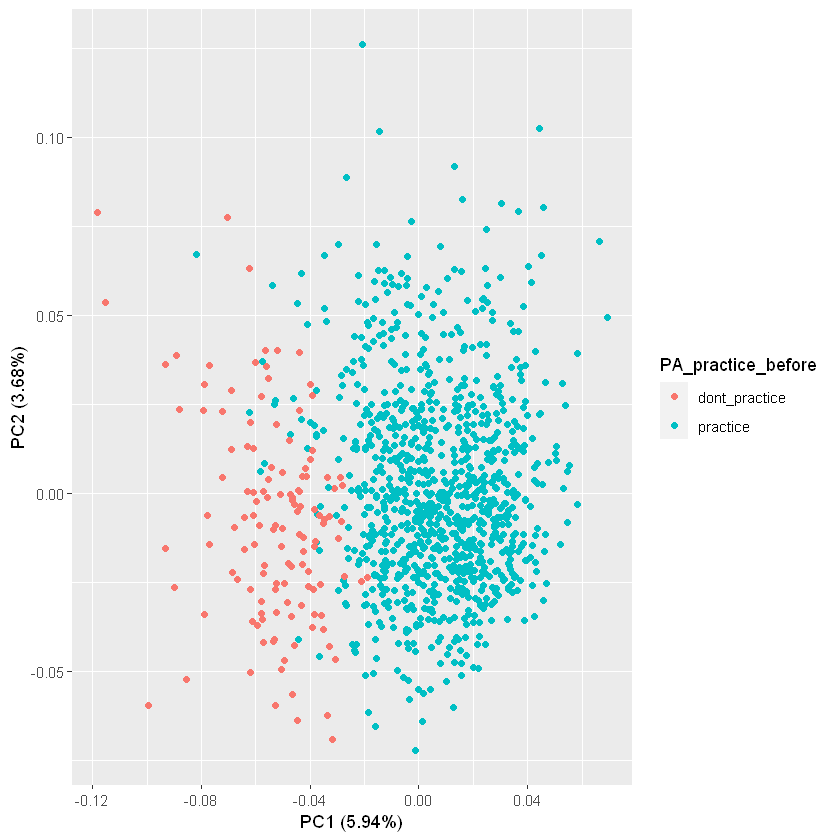

In [63]:
autoplot(before_encoded_dataset.pca, colour="PA_practice_before", data=before_dataset)

## TSNE

In [64]:
tsne <- Rtsne(before_encoded_dataset, dims = 2, perplexity=30, check_duplicates = FALSE, verbose=TRUE)

Performing PCA
Read the 1242 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.35 seconds (sparsity = 0.103850)!
Learning embedding...
Iteration 50: error is 71.353052 (50 iterations in 0.31 seconds)
Iteration 100: error is 71.271667 (50 iterations in 0.21 seconds)
Iteration 150: error is 70.719728 (50 iterations in 0.21 seconds)
Iteration 200: error is 70.716835 (50 iterations in 0.21 seconds)
Iteration 250: error is 70.717029 (50 iterations in 0.21 seconds)
Iteration 300: error is 2.126399 (50 iterations in 0.19 seconds)
Iteration 350: error is 1.953390 (50 iterations in 0.23 seconds)
Iteration 400: error is 1.885247 (50 iterations in 0.25 seconds)
Iteration 450: error is 1.858076 (50 iterations in 0.25 seconds)
Iteration 500: error is 1.839188 (50 iterations in 0.24 seconds)
Iteration 550: error is 1.823929 (50 iterations in 0.28 seconds)
Iteration 60

### Colouring exercise practice before the pandemic

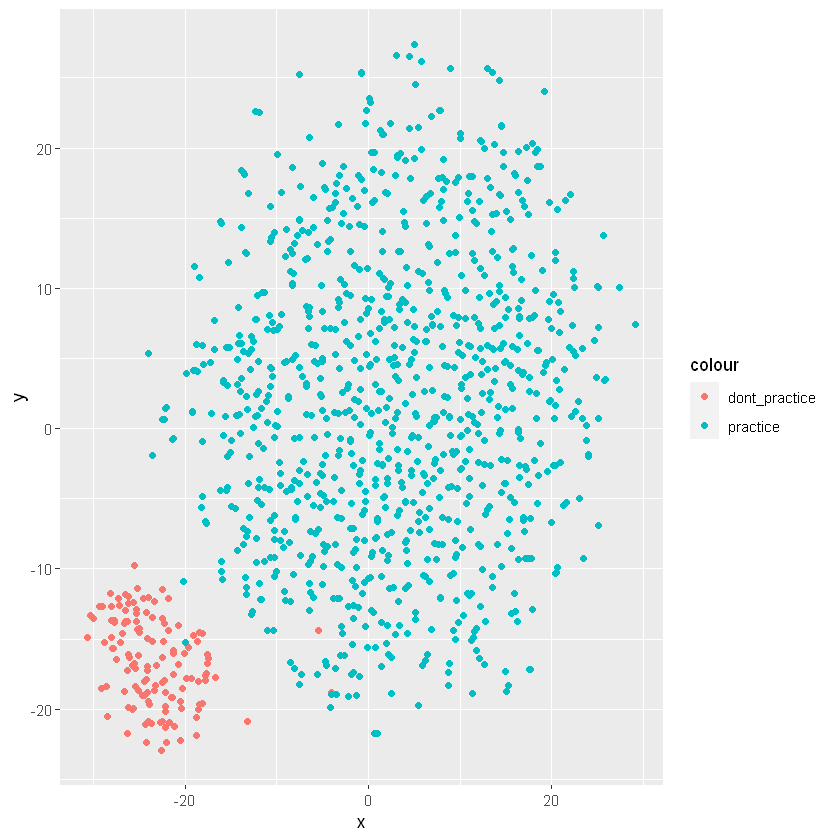

In [65]:
metadata <- data.frame(sample_id = rownames(df_copy),
                       colour = df_copy$PA_practice_before )
tsne_df <- data.frame(
    x = tsne$Y[,1],
    y = tsne$Y[,2],
    colour = metadata$colour)

ggplot(tsne_df, aes(x, y, colour = colour)) + geom_point()

We found out 2 well separare clusters

### Colouring exercise practice during the pandemic

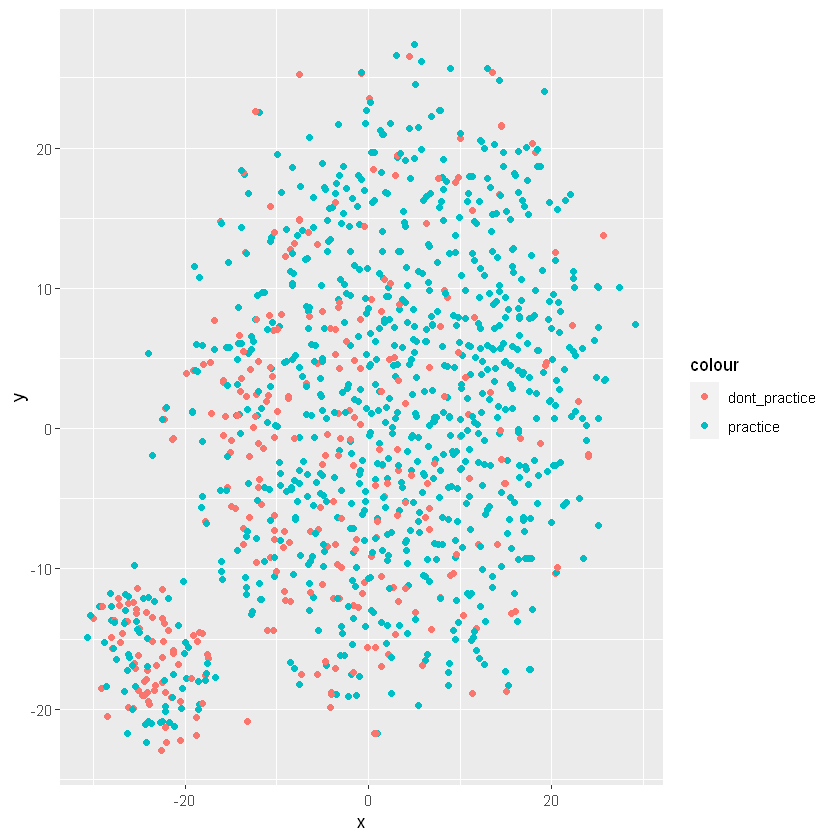

In [66]:
metadata <- data.frame(sample_id = rownames(df_copy),
                       colour = df_copy$PA_practice_during )
tsne_df <- data.frame(
    x = tsne$Y[,1],
    y = tsne$Y[,2],
    colour = metadata$colour)

ggplot(tsne_df, aes(x, y, colour = colour)) + geom_point()

Clusters now are not well defined

### Strange don't practice

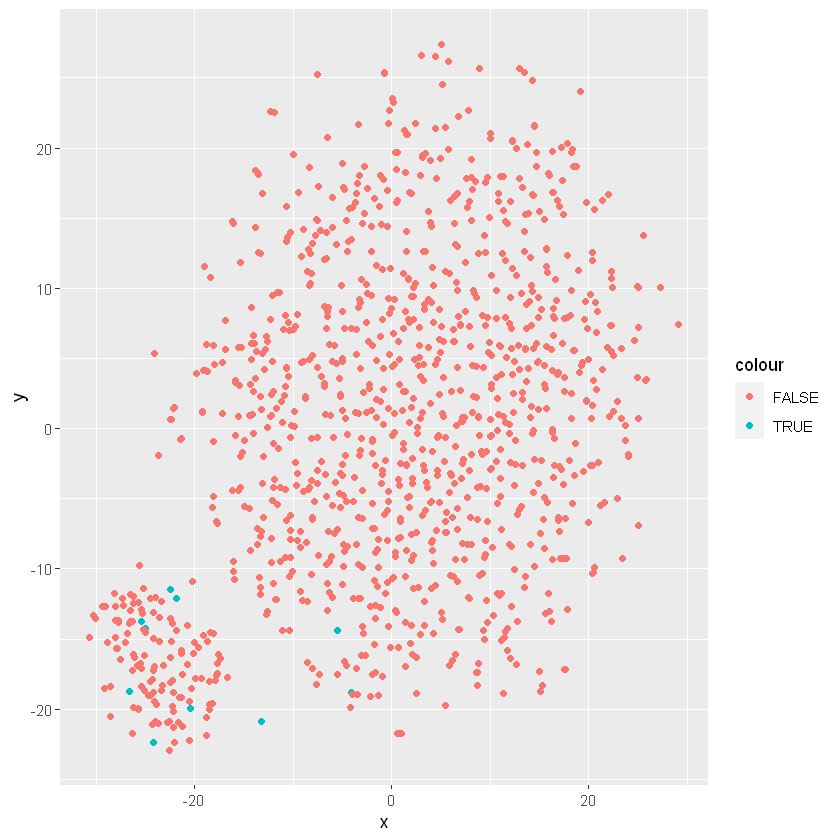

In [67]:
metadata <- data.frame(sample_id = rownames(df_copy),
                       colour = df_copy$strange_dp)
tsne_df <- data.frame(
    x = tsne$Y[,1],
    y = tsne$Y[,2],
    colour = metadata$colour)

ggplot(tsne_df, aes(x, y, colour = colour)) + geom_point()

Most of strange don't practice belong to the don't practice cluster, we can keep that data and exclude the ones far from that cluster.


### Strange practice

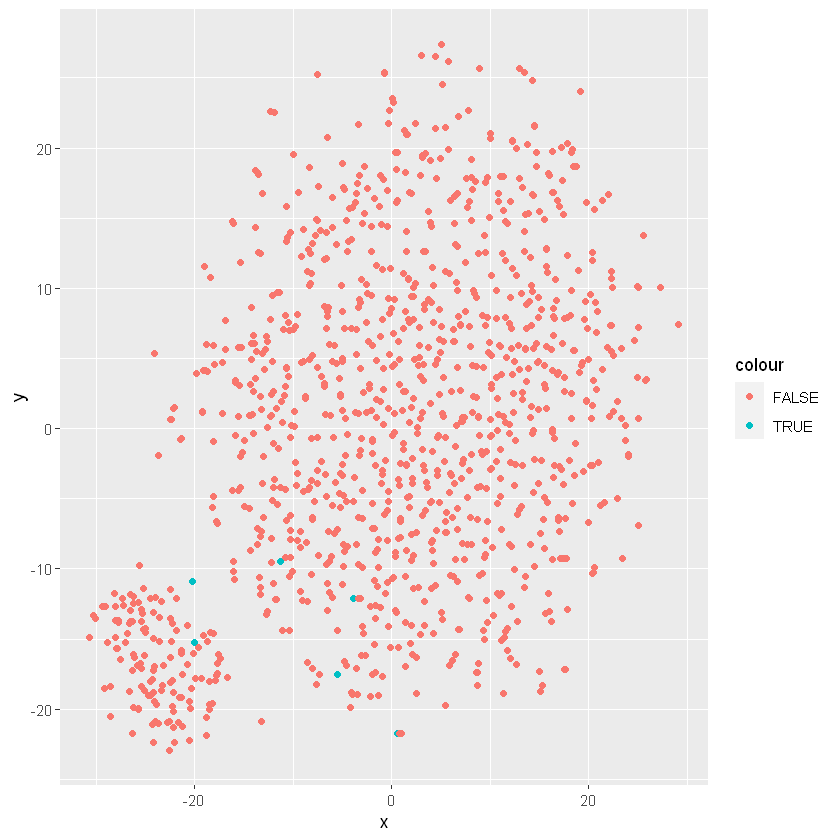

In [68]:
metadata <- data.frame(sample_id = rownames(df_copy),
                       colour = df_copy$strange_p)
tsne_df <- data.frame(
    x = tsne$Y[,1],
    y = tsne$Y[,2],
    colour = metadata$colour)

ggplot(tsne_df, aes(x, y, colour = colour)) + geom_point()


We can keep the strange practice people that belongs to the practice cluster, but exclude the others.

### Has tag or depression

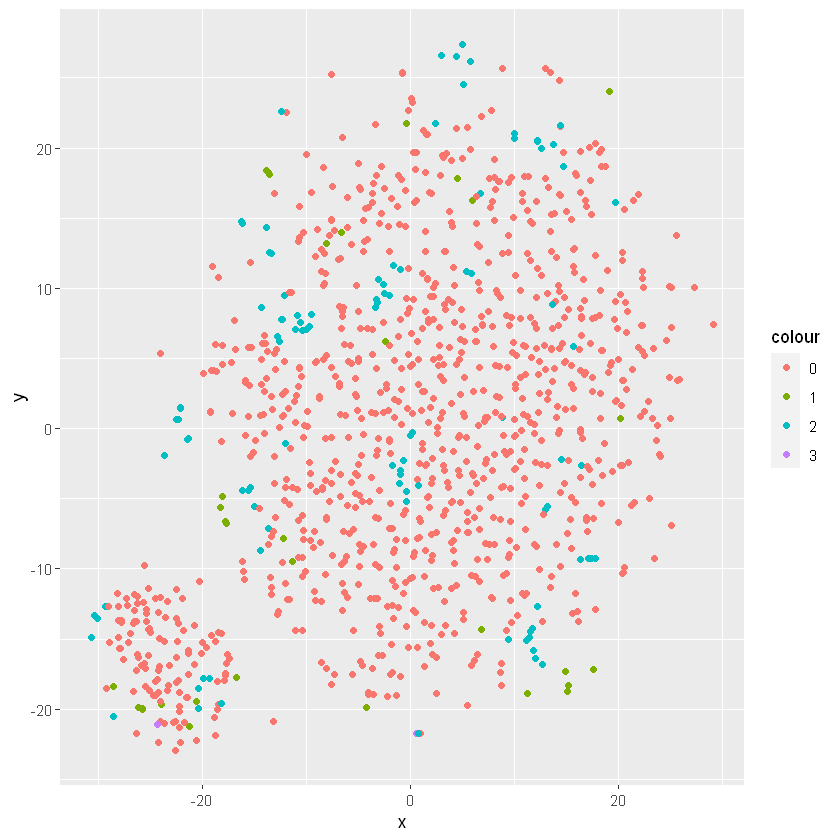

In [70]:
metadata <- data.frame(sample_id = rownames(df_copy),
                       colour = df_copy$depression_anxiety)
tsne_df <- data.frame(
    x = tsne$Y[,1],
    y = tsne$Y[,2],
    colour = metadata$colour)

ggplot(tsne_df, aes(x, y, colour = colour)) + geom_point()